<a href="https://colab.research.google.com/github/RPA-ABS-Holcim/Lineamientos_GAS/blob/DEV/Lineamientos_GAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Declaración de variables
Para la declaración de variables, por favor guiarse del siguiente documento:

[Nomenclatura Variables y Argumentos](https://docs.google.com/spreadsheets/d/1reWZAMjACCsXkCp0oCYHiD95S8CDDF01xW5I7wbGL9o/edit#gid=1037618716)

Ejemplo:


```
# Let  test; //Nombre variable incorrecta.
# Let str_Test; //Nombre variable correcta.
```

La declaración de las variables deben ser tan claras que al momento de leer su nombre, se debe idea del uso de la misma. Adicionalmente siempre las variables deben iniciar con letra minúscula.

Cuando se necesita hacer uso de variables cuyo dato cambia, utilizar **# Let**, si se son datos constantes, utilizar **# Const**.

**Importante:** El uso de variables **# Let** estarán asignadas en un ambito local de función.

Ejemplo:

```
Let Str_Test_1 = "Default 1
function Testing(){
  Let Str_Test_2 = "Default 2";
  Return;
}
Console.Log(Str_Test_1); //Código correcto.
Console.Log(Str_Test_2); //Código erróneo.

```

**Declaración múltiple de variables**

La declaración de variables múltiple debe realizarce utilizando coma por cada variable.

Ejemplo:

```
// declaración correcta
var iAmFine = true, // usa coma
    greatDay = 1, // usa coma
	sampleVariable = true; // usa punto y coma por que es la ultima variable

// declaración erronea
var bad1 = 1;
var iAmFine = false;
var sampleVariable = "wrong";

```

**Tipos de datos en Google Apps Script**

Cuando se quiere declarar variables de tipo primitivo, no se requiere indicar el tipo de variable, sin embargo, para las variable de tipo objeto, es necesario indicar el tipo de variable.

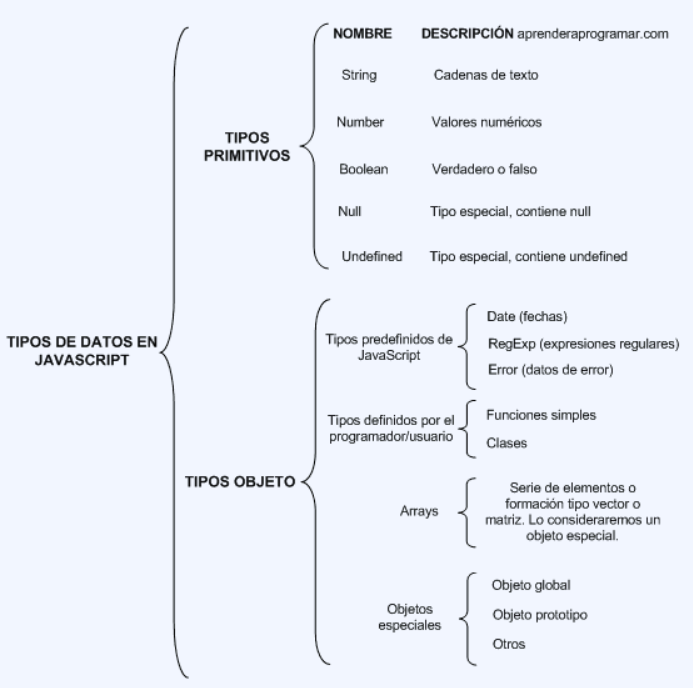

**Ejemplo:**

```
Let dat_Fecha = New Date(),
    arr_Array = {},
    obj_Object = []
```



**Hoisting JavaScript.**

Las variables tipo **# Let** deben ser declaras al inicio de cada función, ya que, el compilador, toma los valores al iniciar su ejecución y si su uso es anterior a su declaración, se presentará un fallo; caso contrario ocurre con las variables declaradas como **# Var,** estas variables si se declaran en cualquier parte del código, al momento de iniciar el compilador, toman valor sin ser necesario que sean declaradas al inicio de la función así sea que su uso sea anterior o posterior a la declaración.

**Nota:** Aplica tanto para funciones como para variables.

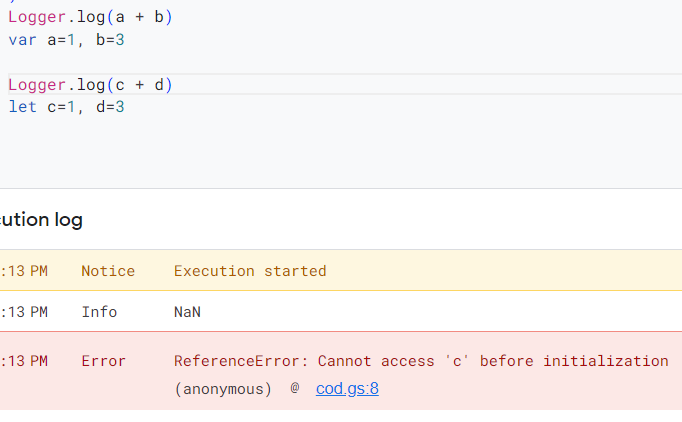

Por favor considerar la siguiente tabla:

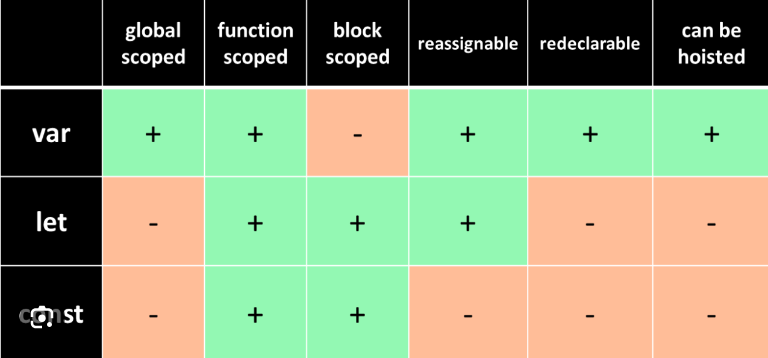









# Funciones

Uno de los elementos más importantes de javascript son las funciones, éstas son conocidas como ciudadanos de primer tipo. Para la declaración de funciones es necesario tener en cuenta las siguientes premisas:


1.   Se debe hacer uso de camelCase.
2.   El nombre de la función siempre debe iniciar con letra minúscula.
3.   Siempre se debe dejar un espacio entre el fin del nombre de la función y la llave de apertura. Ej: function NombreFuncion() {

**Argumentos de una función**

Para mejorar la legibilidad del código javascript los argumentos de funciones deben ser nombres con notación camelCase. Si son varios argumentos deben estar separados por coma (,) y un espacio, de la siguiente manera:


```
function testFunction(arg1, arg2, arg3) {
    console.log('Hello Test...');
}

var testFunction = function(arg1, arg2) {
    console.log('Hello Test...');
}; // ; para fin de sentencia.

```

# Construcción de cadenas

Deben ser usadas comilas simples ( ' ) puesto de ésta manera se reducen los problemas a la hora de escapar las comillas dobles ( " ) usadas cuando se genera HTML y mejora la legibilidad.



```
// Incorrecto
var container0 = "<div class=\"another-container\" data-type=\"html\"></div>";
var container1 = "<div class="+'"'+"another-container"+'"'+
    " data-type="+'"'+"html"+'"'+"></div>";

// Correcto
var containerString = '<div class="container" data-type="html"></div>';
```
**Nota:** Para los casos en que no se estan construyendo elementos del DOM también deben ser usadas las comillas simples por uniformidad en el código.



# Estructuras

### Idioma

Todo código/documentación debe ser llevada en inglés, así mismo, los logs o mensajes que se dejen por parte del desarrollo.

### Código

La estructuración del código debe ser tan clara que desde la lectura del nombre del módulo/función, se pueda entender lo que hace el mismo. Adicionalmente, la documentación debe mantener la siguiente estructura:
```
function getManagersEmployees(userEmail) {
  /*
  Function to obtain the user rol, if the rol is user, return the email, but if the rol is admin, return the list of users.
  
  Parameter:
    - in_str_userEmail [String]: User email.
  Return:
    - out_str_userEmail [String]: User email without domain.
    - out_arr_users [Array]: List of users in the 'roles' sheet.
  */
}
```
Como se ve en el ejemplo, la función tiene una corta descripción de lo que hace, así mismo, cuenta con los parámetros que entran a la función (in) y los parámetros que salen (out) de la misma.

### Nombre módulos .gs

Cada módulo .gs debe contener exclusivamente las funciones que hagan referencia a su uso, es decir, cada módulo debe contener responsabilidades únicas. Ejemplo:

.gs: GetEmailUsers.gs
```
function getUserEmail(){
/*
  Function to get the user email.
  Parameter:
    - N/A
  Return:
    - email [String]: User email registered.
  */
return Session.getActiveUser().getEmail()
}

function getManagersEmployees(userEmail) {
  /*
  Function to obtain the user rol, if the rol is user, return the email, but if the rol is admin, return the list of users.
  
  Parameter:
    - in_str_userEmail [String]: User email.
  Return:
    - out_str_userEmail [String]: User email without domain.
    - out_arr_users [Array]: List of users in the 'roles' sheet.
  */
}

```

### Uso de Logs

Cada inicio y fin de función debe ser indicada con el fin de hacer un correcto monitoreo de las ejecuciones:

```
function access(email, arr_Ids) {
  Logger.log('[access] - Start function.')  
  let folder = DriveApp.getFolderById(attachmentsFolder);
  Logger.log('[access] - End of function.')
}
```

Para el uso de módulos .gs, es recomendable hacer uso de Logger.log, si se está trabajando en módulos .html, se debe utilizar Console.log.

# Control de errores

El control de errores se refiere al control de posibles excepciones que se pueden presentar durante la ejecución del código, para estos casos se debe hacer uso del Try Catch, bajo la siguiente estructura:
```
try {
  // statements to try
  monthName = getMonthName(myMonth); // function could throw exception
} catch (e) {
  monthName = "unknown";
  logMyErrors(e); // pass exception object to error handler (i.e. your own function)
}
```

Así mismo, si se requiere generar una excepción bajo el no cumplimiento de una regla parametrizada, hacer uso del Throw:

```
throw "Error2"; // String type
throw 42; // Number type
throw true; // Boolean type
```
Ejemplo:


```
function myFunction() {
  try {
    // statements to try
    monthName = getMonthName(myMonth); // function could throw exception
  } catch (e) {
    monthName = 'unknown';
    console.log(e); // pass exception object to error handler (i.e. your own function)
    if(monthName == 'unknown'){throw "BIZ001 - Variable 'myMonth is not declared."};
  }
}
```





# Enlaces de interés


*   https://github.com/0granada/js-coding-standards
*   https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Control_flow_and_error_handling
*   https://developer.wordpress.org/coding-standards/wordpress-coding-standards/javascript/#:~:text=Lines%20should%20usually%20be%20no,always%20go%20on%20multiple%20lines

